In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Lade die Ergebnisse und bestimme die relevanten columns

In [2]:
df = pd.read_csv('zensus_und_wahlergebnis_darmstadt.csv')
cls_parteien = ['Anteil_SPD', 'Anteil_CDU', 'Anteil_Grüne', 'Anteil_FDP', 'Anteil_AfD', 'Anteil_Linke']
cls_zensus = ['Anteil_Auslaender','FlaechejeBew', 'Durchschnittsalter', 'Durchschnittsmiete_qm', 'Anteil_Eigentuemer']

Skaliere die erklärenden Variablen

In [3]:
x = df[cls_zensus].values
x_scaler = StandardScaler()
x_standard = x_scaler.fit_transform(x)

In [4]:
# fürs plotten
palette = {'SPD': '#f44647', 
           'CDU': 'black', 
           'Grüne': '#46962b', 
           'FDP': '#ffd600', 
           'AfD': '#8b4513', 
           'Linke': '#c72767'}

Definiere die Funktionen für die Analyse

In [116]:
# Erzeuge das statistische Modell
def erzeuge_st_model(x_stand, partei_ergebnis):
    partei_scaler = StandardScaler()
    partei_stand = partei_scaler.fit_transform(partei_ergebnis)
    model = LinearRegression(fit_intercept  = False).fit(x_stand, partei_stand)
    score = model.score(x_standard,partei_stand)
    return model, partei_scaler, score

# Schreibe die wichtigsten Ergebnisse
def write_ergebnisse(model, score, n):
    p = model.n_features_in_
    adj = 1-(1-score) * (n-1)/(n-p-1)
    dict_texte = {
        'r2': np.round(score,2),
        'ar2': np.round(adj,2),
    }
    koef=[]
    for i in range(len(cls_zensus)):
        koef.append(cls_zensus[i] + ' ' + str(np.round(model.coef_[0][i],2)))
        # dict_texte[cls_zensus[i]] = str(np.round(model.coef_[0][i],2))
        dict_texte[cls_zensus[i]] = format(model.coef_[0][i], '.2f')
    
    print(f"Das Modell hat ein R^2 von: {np.round(score,2)}")
    print(f"Das Modell hat ein adj R^2 von: {np.round(adj,2)}")
    print('Koeffizienten:', '\n'.join(koef))
    return dict_texte
# Predicte mit dem Modell das Ergebnis der Partei
def mache_predict(model, x_stand, partei_scaler):
    pred = model.predict(x_stand)
    return pred, partei_scaler.inverse_transform(pred)

# Plotte die Resultate vs die realen Ergebnisse der Partei
def plotte_model_resultate(pred, partei, partei_name, dict_text, ax):
    sns.scatterplot(x = pred.reshape(-1), y = partei.reshape(-1), color=palette[partei_name], ax=ax)
    g = sns.lineplot(x = [0.05, 0.35], y = [0.05, 0.35], color = palette[partei_name], ax = ax)
    g.set(title = partei_name, xlabel = 'Vorhergesagtes Ergebnis', ylabel = 'Parteiergebnis')
    # text_rechts = "\n".join(['{0: >22}'.format(x + ':') + dict_text[x] for x in cls_zensus])
    text_rechts = "\n".join([f"{x:<21}: {dict_text[x]:>5}" for x in cls_zensus])
    g.figure.text(.57,.15, text_rechts, {'font': 'monospace', 'size': 9})
    # axx = plt.gca()
    # axx.text(.58,.15, text_rechts, {'font': 'monospace', 'size': 9}, transform=axx.transAxes)
    oben_links = f"$R^2$ = {dict_text['r2']}\n$R^2_{{adj}}$ = {dict_text['ar2']}"
    g.figure.text(.15,.80, oben_links)
    # axx.text(.15,.80, oben_links, transform=axx.transAxes)
    
    return g

# Packe alles in eine Funktion
def analysiere_partei(partei_name, x_stand, partei_ergebnis, ax = None):
    print("Mache Analyse für ", partei_name)
    mdl, ps, sc = erzeuge_st_model(x_stand=x_stand, partei_ergebnis=partei_ergebnis)
    pred, pred_sc = mache_predict(mdl, x_stand=x_stand, partei_scaler=ps)
    dtext = write_ergebnisse(mdl, sc, n = len(partei_ergebnis))
    return plotte_model_resultate(pred=pred_sc, partei = partei_ergebnis, partei_name=partei_name, dict_text=dtext, ax=ax), pred_sc



Wähle eine Partei und lasse diese Analysieren

Mache Analyse für  CDU
Das Modell hat ein R^2 von: 0.69
Das Modell hat ein adj R^2 von: 0.67
Koeffizienten: Anteil_Auslaender 0.26
FlaechejeBew 0.53
Durchschnittsalter 0.19
Durchschnittsmiete_qm 0.1
Anteil_Eigentuemer 0.41


(<Axes: title={'center': 'CDU'}, xlabel='Vorhergesagtes Ergebnis', ylabel='Parteiergebnis'>,
 array([[0.1373267 ],
        [0.14183697],
        [0.0951847 ],
        [0.1486776 ],
        [0.12717276],
        [0.11381549],
        [0.15044382],
        [0.17673827],
        [0.14722692],
        [0.13910164],
        [0.18479523],
        [0.11803446],
        [0.11393281],
        [0.12691165],
        [0.11742287],
        [0.11322954],
        [0.11776972],
        [0.11592668],
        [0.18510923],
        [0.148161  ],
        [0.27817355],
        [0.27914738],
        [0.21568417],
        [0.18669022],
        [0.15162768],
        [0.16395389],
        [0.12374845],
        [0.16738362],
        [0.1568213 ],
        [0.19846726],
        [0.14250599],
        [0.13090051],
        [0.18376169],
        [0.12797971],
        [0.15569574],
        [0.16352326],
        [0.16687125],
        [0.12560609],
        [0.18872035],
        [0.23025571],
        [0.16174934],
     

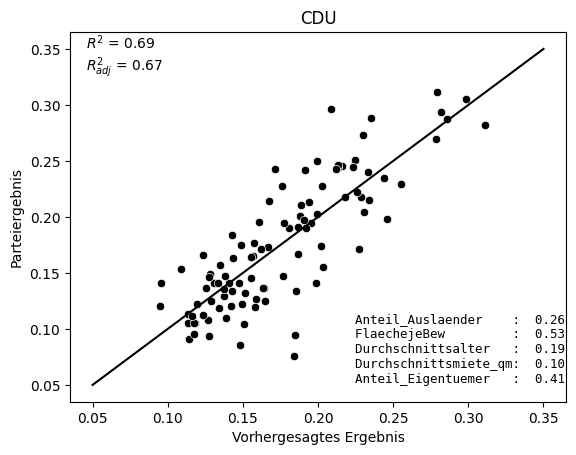

In [117]:
pt = 'Anteil_CDU'
partei_ergebnis = df[pt].values.reshape(-1,1)
partei_name = pt.replace("Anteil_", "")
analysiere_partei(partei_name, x_standard, partei_ergebnis)

Mache Analyse für  SPD
Das Modell hat ein R^2 von: 0.29
Das Modell hat ein adj R^2 von: 0.25
Koeffizienten: Anteil_Auslaender 0.29
FlaechejeBew -0.25
Durchschnittsalter 0.57
Durchschnittsmiete_qm -0.14
Anteil_Eigentuemer 0.29


C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_2916\204531499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_write[f"Modell_{partei_name}"] = pred
C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_2916\204531499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_write[f"Modell_{partei_name}"] = pred
C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_2916\204531499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Mache Analyse für  CDU
Das Modell hat ein R^2 von: 0.69
Das Modell hat ein adj R^2 von: 0.67
Koeffizienten: Anteil_Auslaender 0.26
FlaechejeBew 0.53
Durchschnittsalter 0.19
Durchschnittsmiete_qm 0.1
Anteil_Eigentuemer 0.41
Mache Analyse für  Grüne
Das Modell hat ein R^2 von: 0.5
Das Modell hat ein adj R^2 von: 0.47
Koeffizienten: Anteil_Auslaender -0.68
FlaechejeBew 0.07
Durchschnittsalter -0.27
Durchschnittsmiete_qm 0.44
Anteil_Eigentuemer -0.42
Mache Analyse für  FDP
Das Modell hat ein R^2 von: 0.48
Das Modell hat ein adj R^2 von: 0.45
Koeffizienten: Anteil_Auslaender 0.15
FlaechejeBew 0.68
Durchschnittsalter -0.07
Durchschnittsmiete_qm 0.34
Anteil_Eigentuemer 0.11


C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_2916\204531499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_write[f"Modell_{partei_name}"] = pred
C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_2916\204531499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_write[f"Modell_{partei_name}"] = pred
C:\Users\BoroNedic\AppData\Local\Temp\ipykernel_2916\204531499.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Mache Analyse für  AfD
Das Modell hat ein R^2 von: 0.6
Das Modell hat ein adj R^2 von: 0.58
Koeffizienten: Anteil_Auslaender 0.63
FlaechejeBew -0.21
Durchschnittsalter 0.18
Durchschnittsmiete_qm -0.53
Anteil_Eigentuemer 0.45
Mache Analyse für  Linke
Das Modell hat ein R^2 von: 0.62
Das Modell hat ein adj R^2 von: 0.6
Koeffizienten: Anteil_Auslaender -0.4
FlaechejeBew -0.39
Durchschnittsalter -0.24
Durchschnittsmiete_qm 0.02
Anteil_Eigentuemer -0.54


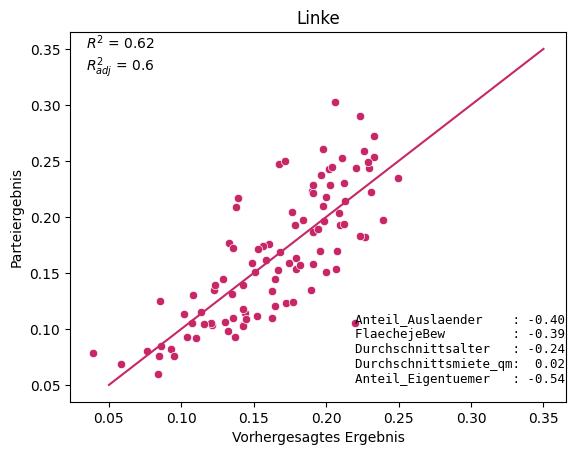

In [118]:
df_write = df[['WAHLBEZIRK'] + cls_zensus + cls_parteien]
for pt in cls_parteien:
    plt.clf()
    partei_ergebnis = df[pt].values.reshape(-1,1)
    partei_name = pt.replace("Anteil_", "")
    fg , pred = analysiere_partei(partei_name, x_standard, partei_ergebnis)
    fg.get_figure().savefig(f"{partei_name}_lineares_modell.png")
    df_write[f"Modell_{partei_name}"] = pred
    

In [120]:
df_write[
    ['WAHLBEZIRK'] + cls_zensus + [
        'Anteil_SPD', 'Modell_SPD',
        'Anteil_CDU', 'Modell_CDU',
        'Anteil_Grüne', 'Modell_Grüne',
        'Anteil_Linke', 'Modell_Linke',
        'Anteil_FDP', 'Modell_FDP',
        'Anteil_AfD'
    ]].to_csv("wahlergebnisse_und_modellprognosen_pro_partei_und_wahlbezirk.csv", index=False)